In [1]:
import onnxruntime as rt
from sklearn.metrics import accuracy_score
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np
from testing import *

/var/folders/hz/8qhn2dwn2zs419cpd7l0w6q40000gn/T/ipykernel_19418/1932350364.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# First we load the models and the data 
data = pd.read_csv('data/investigation_train_large_checked.csv')
y = data['checked']
X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)

model1 = rt.InferenceSession("model/model_1.onnx")
model2 = rt.InferenceSession("model/RFmodel.onnx")


# Mutation testing

In [3]:
mutationTestResults = mutationTest(model1,model2,X,y,10)
compareAccuracies(mutationTestResults)


Run 1/10
Initial accuracies: 0.8871 for model 1, 0.9902 for model 2
Model 1 Accuracy altered: 0.5035, Model 2 Accuracy altered: 0.7363

Run 2/10
Initial accuracies: 0.8838 for model 1, 0.9901 for model 2
Model 1 Accuracy altered: 0.5060, Model 2 Accuracy altered: 0.7362

Run 3/10
Initial accuracies: 0.8857 for model 1, 0.9900 for model 2
Model 1 Accuracy altered: 0.5018, Model 2 Accuracy altered: 0.7366

Run 4/10
Initial accuracies: 0.8887 for model 1, 0.9897 for model 2
Model 1 Accuracy altered: 0.5007, Model 2 Accuracy altered: 0.7358

Run 5/10
Initial accuracies: 0.8858 for model 1, 0.9887 for model 2
Model 1 Accuracy altered: 0.5017, Model 2 Accuracy altered: 0.7375

Run 6/10
Initial accuracies: 0.8871 for model 1, 0.9903 for model 2
Model 1 Accuracy altered: 0.5010, Model 2 Accuracy altered: 0.7407

Run 7/10
Initial accuracies: 0.8868 for model 1, 0.9907 for model 2
Model 1 Accuracy altered: 0.5032, Model 2 Accuracy altered: 0.7335

Run 8/10
Initial accuracies: 0.8909 for model 1

In [4]:
# Wilcoxon Test
stat, p_value = wilcoxon(mutationTestResults['model1'], mutationTestResults['model1_mutated'])
print("\nWilcoxon Test Results for Model 1:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in performance between original and mutated models.")
else:
    print("No significant difference in performance between original and mutated models.")

 # Wilcoxon Test
stat, p_value = wilcoxon(mutationTestResults['model2'], mutationTestResults['model2_mutated'])
print("\nWilcoxon Test Results for Model 2:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in performance between original and mutated models.")
else:
    print("No significant difference in performance between original and mutated models.")


Wilcoxon Test Results for Model 1:
Statistic: 0.0000, P-value: 0.0020
Significant difference in performance between original and mutated models.

Wilcoxon Test Results for Model 2:
Statistic: 0.0000, P-value: 0.0020
Significant difference in performance between original and mutated models.


# Differentiation Testing


In [5]:
features_to_modify = ['contacten_soort_document__uitgaand_' , 'afspraak_aantal_woorden' ,'persoon_leeftijd_bij_onderzoek','relatie_kind_leeftijd_verschil_ouder_eerste_kind','persoonlijke_eigenschappen_spreektaal']

metrics = differentiationTesting(model1,model2,X,y,0.2,features_to_modify,10)
print_average_metrics(metrics)


Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10
Average Metrics Across Runs:

Model 1:
accuracy_before: 0.89
accuracy_after: 0.87
tp_before: 992.10
tp_after: 1126.80
fp_before: 53.90
fp_after: 524.40
tn_before: 22064.80
tn_after: 21594.30
fn_before: 2889.20
fn_after: 2754.50

Model 2:
accuracy_before: 0.99
accuracy_after: 0.99
tp_before: 3623.50
tp_after: 3619.00
fp_before: 4.10
fp_after: 4.10
tn_before: 22114.60
tn_after: 22114.60
fn_before: 257.80
fn_after: 262.30


# Equivalence partitioning 

In [3]:
print("Top 5 worst performing features for model 1: ")
model1_results = calculateEPHighestDifference(data,model1)
print(model1_results)

print("Top 5 worst performing features for model 2: ")
model2_results = calculateEPHighestDifference(data,model2)
print(model2_results)

Top 5 worst performing features for model 1: 
                                 feature  accuracy_difference  \
135  contacten_onderwerp_inname_aanvraag             0.556843   
93      contacten_onderwerp__werk_intake             0.410047   
80                     competentie_leren             0.389976   
171       contacten_soort_rapportage_rib             0.272487   
163               contacten_soort_anders             0.270833   

                                            accuracies  
135  [0.8901767521205516, 0.867576178416796, 0.3333...  
93   [0.9100470957613814, 0.8725092660056388, 0.797...  
80       [0.8899758388286374, 0.8634810571801829, 0.5]  
171  [0.9015412885322133, 0.8685774256489092, 0.922...  
163  [0.8685968015595105, 0.891636807654583, 0.8493...  
Top 5 worst performing features for model 2: 
                                               feature  accuracy_difference  \
195        instrument_reden_beeindiging_historie_other             0.990959   
152              


Run 1


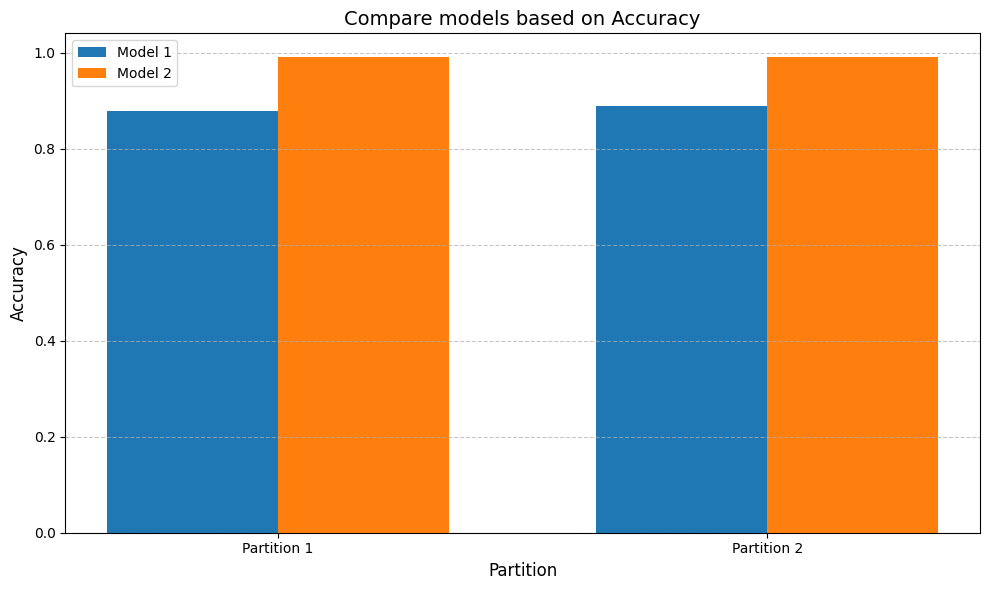

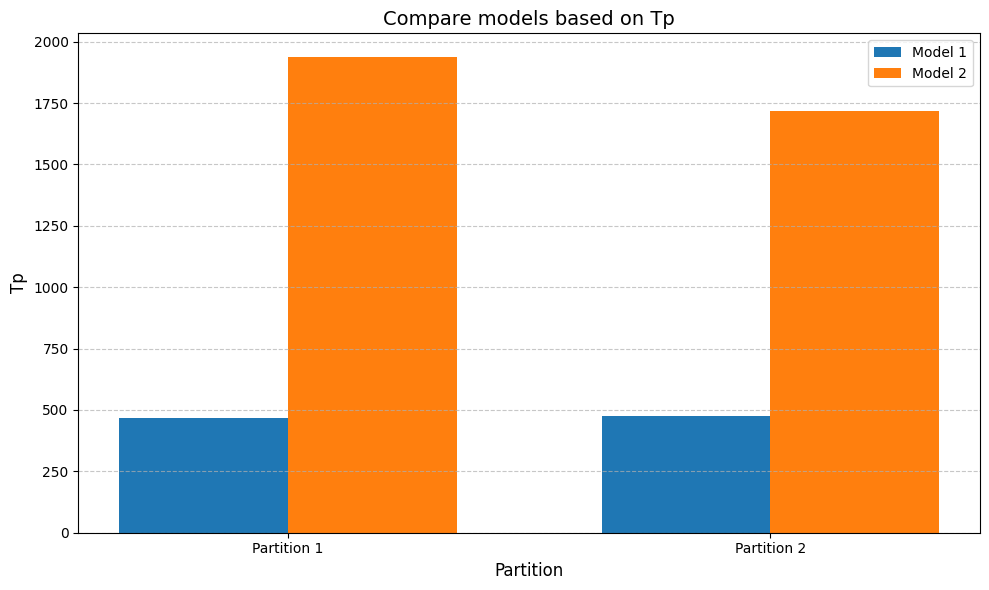

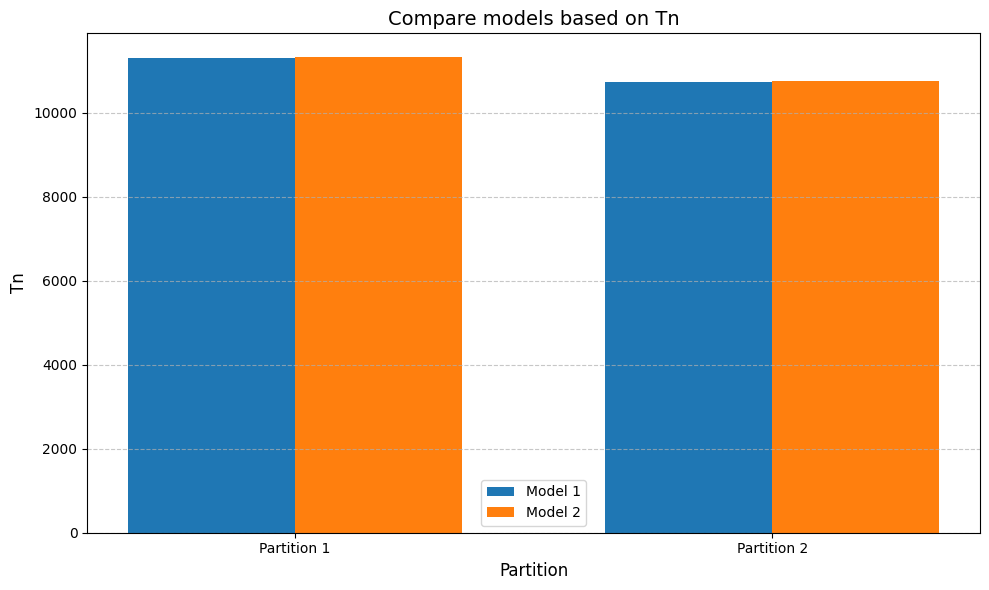

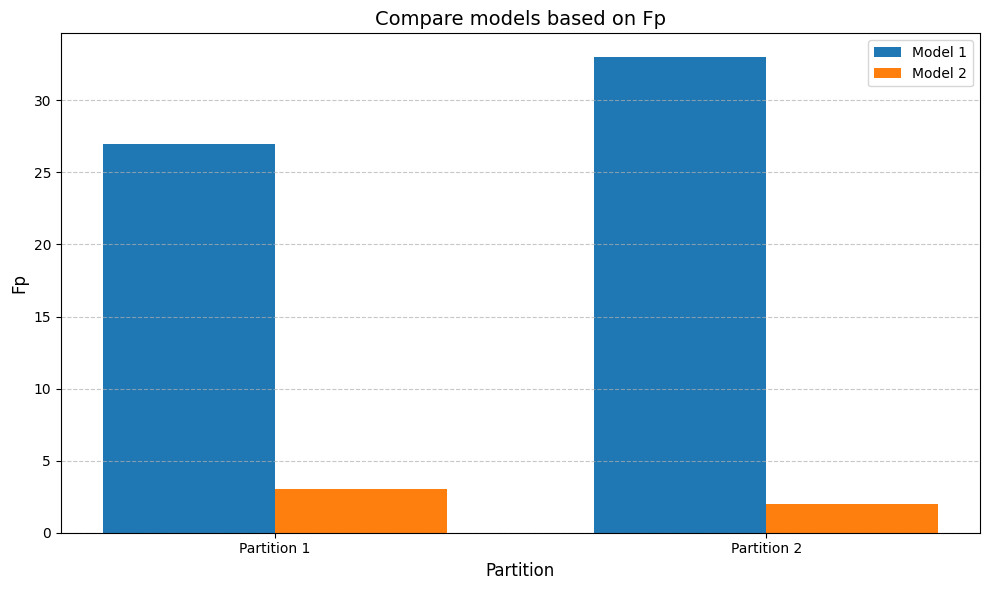

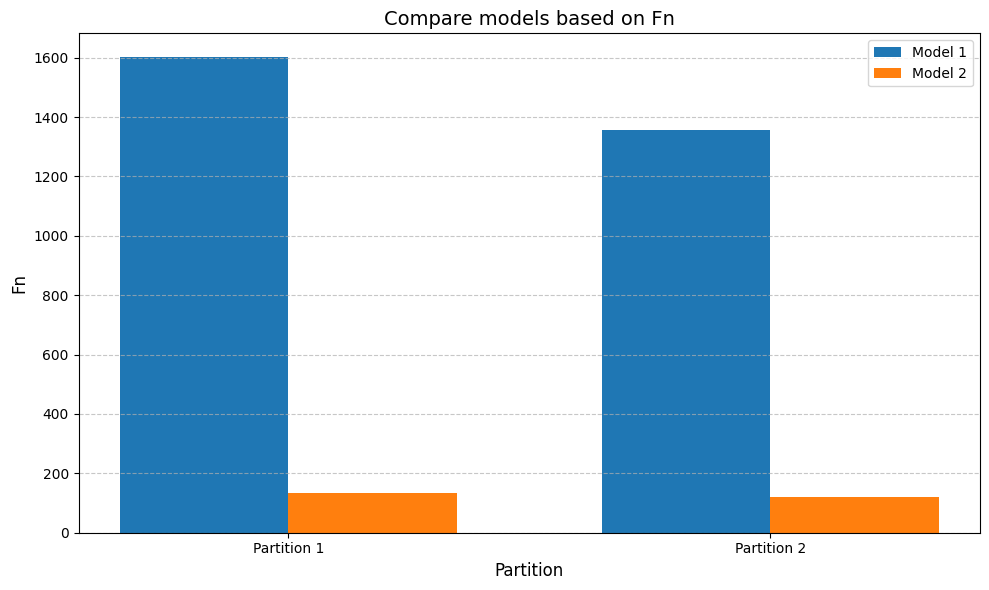

In [ ]:
gender_partitions = [
    {"name": "Man", "condition": lambda df: df['persoon_geslacht_vrouw'] < 1},
    {"name": "Woman", "condition": lambda df: (df['persoon_geslacht_vrouw'] >= 1)}
    
]

EPResults = equivalencePartitioning(model1,model2,X,y,gender_partitions,1)

plot_EP_results(EPResults,'accuracy')
plot_EP_results(EPResults,'tp')
plot_EP_results(EPResults,'tn')
plot_EP_results(EPResults,'fp')
plot_EP_results(EPResults,'fn')